In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('train.csv')

## Data Exploration/Visualization

In [35]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [36]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


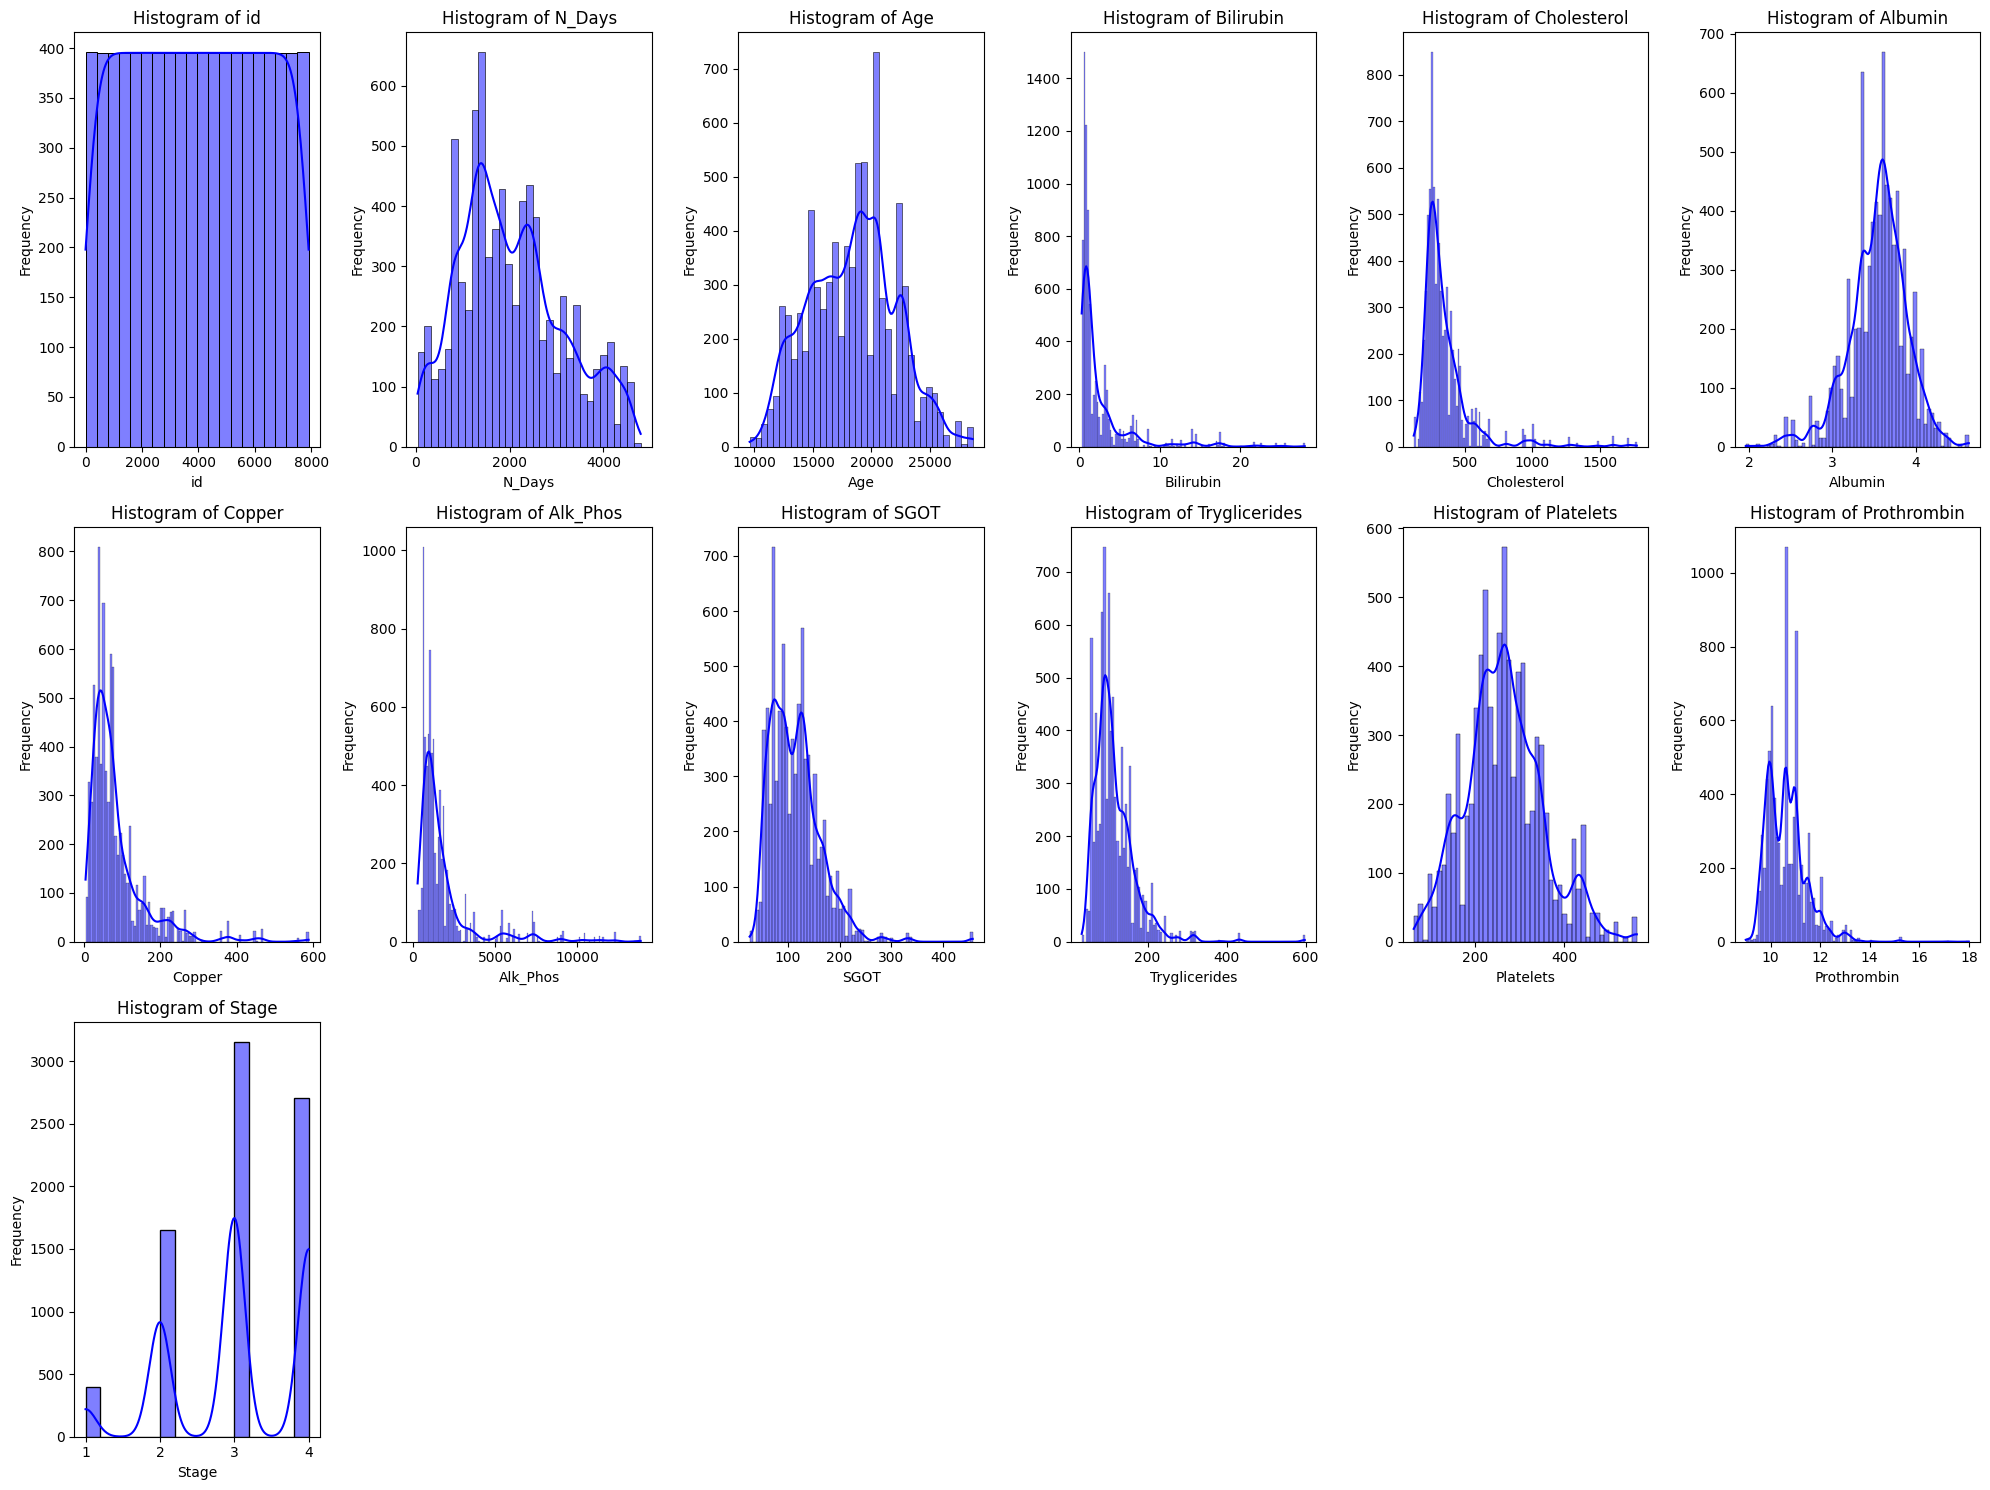

In [37]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

num_cols = len(numerical_columns.columns)
num_rows = num_cols // 6 + (num_cols % 6 > 0) #calculating the needed amount of columns

fig, axes = plt.subplots(num_rows, 6, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    sns.histplot(df[column], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(num_cols, num_rows * 6): #hiding any unused subplots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


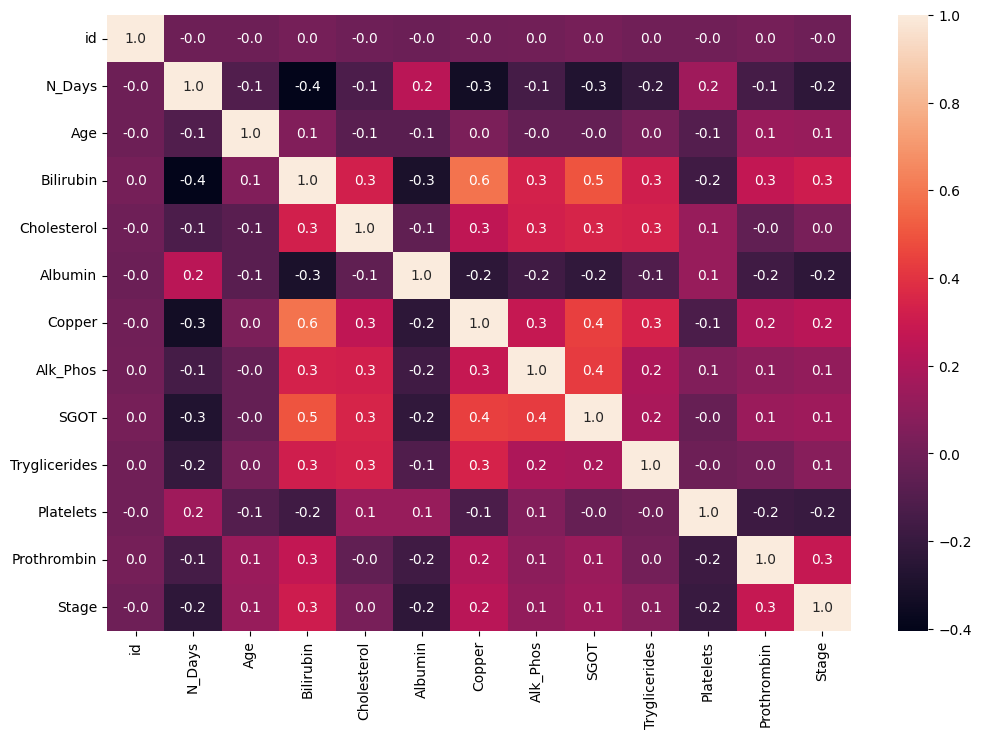

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(method='spearman'), annot=True, fmt=".1f", )
plt.show()

## Data Preprocessing

In [39]:
df.info() #Doesn't look like my data contains any null inputs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [40]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n") #Target doesn't appear to contain any typos.

Value Counts for Drug:
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

Value Counts for Sex:
Sex
F    7336
M     569
Name: count, dtype: int64

Value Counts for Ascites:
Ascites
N    7525
Y     380
Name: count, dtype: int64

Value Counts for Hepatomegaly:
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

Value Counts for Spiders:
Spiders
N    5966
Y    1939
Name: count, dtype: int64

Value Counts for Edema:
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

Value Counts for Status:
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64



In [41]:
#I'll scale and encode my dataset.


categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

for col in categorical_columns:
    print(f'Possible {col} values:', df[col].unique())

Possible Drug values: ['D-penicillamine' 'Placebo']
Possible Sex values: ['M' 'F']
Possible Ascites values: ['N' 'Y']
Possible Hepatomegaly values: ['N' 'Y']
Possible Spiders values: ['N' 'Y']
Possible Edema values: ['N' 'Y' 'S']
Possible Status values: ['D' 'C' 'CL']


In [81]:
from sklearn.preprocessing import RobustScaler #less sensitive to outliers, which my data has a lot of.
#scaling the features in preparation for random forest.

scaler = RobustScaler()
to_scale = ['N_Days','Bilirubin','Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
df[to_scale] = scaler.fit_transform(df[to_scale])

In [82]:
df['Drug'].replace('D-penicillamine', 0, inplace=True)
df['Drug'].replace('Placebo', 1, inplace=True)

df['Sex'].replace('F', 0, inplace=True) #all these categories were so different, didn't know how else to handle lol
df['Sex'].replace('M', 1, inplace=True)

df['Ascites'].replace('N', 0, inplace=True)
df['Ascites'].replace('Y', 1, inplace=True)

df['Hepatomegaly'].replace('N', 0, inplace=True)
df['Hepatomegaly'].replace('S', 1, inplace=True)
df['Hepatomegaly'].replace('Y', 2, inplace=True)

df['Spiders'].replace('N', 0, inplace=True)
df['Spiders'].replace('Y', 1, inplace=True)

df['Edema'].replace('N', 0, inplace=True)
df['Edema'].replace('S', 1, inplace=True)
df['Edema'].replace('Y', 2, inplace=True)

df['Status'].replace('C', 0, inplace=True)
df['Status'].replace('CL', 1, inplace=True)
df['Status'].replace('D', 2, inplace=True)

In [83]:
df.head() #Scaled and label-encoded

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,-0.570254,0,0.551663,1,0,0,0,0,0.521739,0.126761,-0.547619,1.730159,0.410557,1.150,-0.745455,1.228571,-0.9,0.0,2
1,1,0.509253,1,0.102544,0,0,0,0,0,-0.086957,0.464789,-0.095238,0.000000,0.253177,0.425,-0.290909,0.914286,0.4,0.0,0
2,2,1.094585,1,-0.975734,0,0,2,1,2,0.956522,0.007042,-0.071429,1.079365,-0.148583,0.175,-0.981818,-0.628571,1.1,0.5,2
3,3,0.510624,1,-0.049511,0,0,0,0,0,-0.217391,-0.295775,-0.190476,-0.079365,0.461388,-0.600,-0.145455,0.038095,0.1,0.0,0
4,4,-0.714873,1,-0.402153,0,0,2,0,0,0.000000,0.338028,0.166667,0.000000,0.000000,0.275,-0.145455,0.314286,0.0,0.5,0


## Model Creation

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [85]:
X = df.drop(columns=['Status', 'id'])
y = df['Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.8311195445920304

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       966
           1       0.73      0.15      0.25        52
           2       0.84      0.72      0.78       563

    accuracy                           0.83      1581
   macro avg       0.80      0.60      0.64      1581
weighted avg       0.83      0.83      0.82      1581



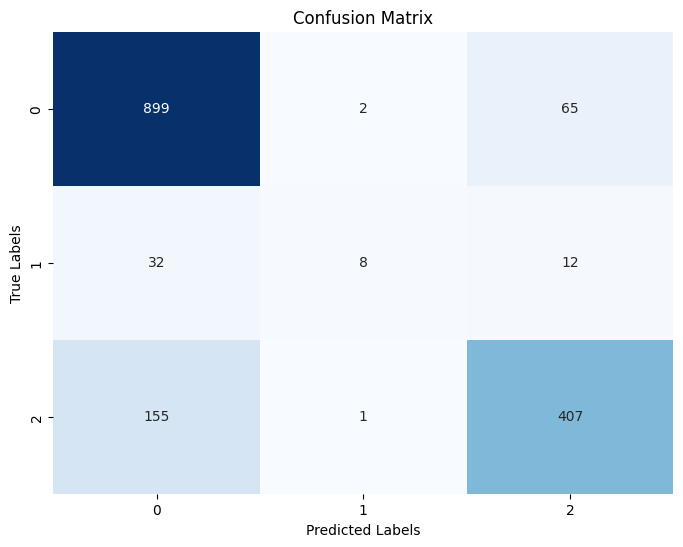

In [87]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Model Deployment

In [106]:
df_test = pd.read_csv('test.csv')

In [107]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [108]:
scaler2 = RobustScaler()
to_scale_test = ['N_Days','Bilirubin','Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

scaled_values = scaler2.fit_transform(df_test[to_scale_test])

scaled_df = pd.DataFrame(scaled_values, columns=to_scale_test)

df_test[to_scale_test] = scaled_df

In [109]:
df_test['Drug'].replace('D-penicillamine', 0, inplace=True)
df_test['Drug'].replace('Placebo', 1, inplace=True)

df_test['Sex'].replace('F', 0, inplace=True)
df_test['Sex'].replace('M', 1, inplace=True)

df_test['Ascites'].replace('N', 0, inplace=True)
df_test['Ascites'].replace('Y', 1, inplace=True)

df_test['Hepatomegaly'].replace('N', 0, inplace=True)
df_test['Hepatomegaly'].replace('S', 1, inplace=True)
df_test['Hepatomegaly'].replace('Y', 2, inplace=True)

df_test['Spiders'].replace('N', 0, inplace=True)
df_test['Spiders'].replace('Y', 1, inplace=True)

df_test['Edema'].replace('N', 0, inplace=True)
df_test['Edema'].replace('S', 1, inplace=True)
df_test['Edema'].replace('Y', 2, inplace=True)

In [110]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,1.342250,0,0.185305,0,0,2,0,0,0.043478,1.739437,-0.476190,0.000000,0.486460,0.714059,-0.259259,1.583333,0.0,2.0
1,7906,0.401920,0,-0.773314,0,0,0,0,0,0.000000,2.542254,1.547619,0.460317,0.113245,0.714059,0.944444,-0.296296,-0.6,2.0
2,7907,-1.255830,1,-1.141906,0,0,2,0,2,0.391304,-1.042254,-1.452381,-0.301587,-0.178237,-0.590945,-0.055556,-0.425926,2.4,4.0
3,7908,0.307270,0,0.343964,0,0,0,0,0,-0.217391,-0.042254,0.666667,-0.396825,-0.579025,0.295473,-0.888889,0.101852,0.0,2.0
4,7909,-0.183128,0,0.625353,0,0,2,0,0,0.130435,-0.154930,-1.428571,0.888889,-0.031512,0.286736,0.407407,-0.351852,-0.8,1.0


In [121]:
#Using the model...

TESTSET = df_test.drop(columns=['id'])
y_test_pred=rf_classifier.predict(TESTSET)
prob_test=rf_classifier.predict_proba(TESTSET)

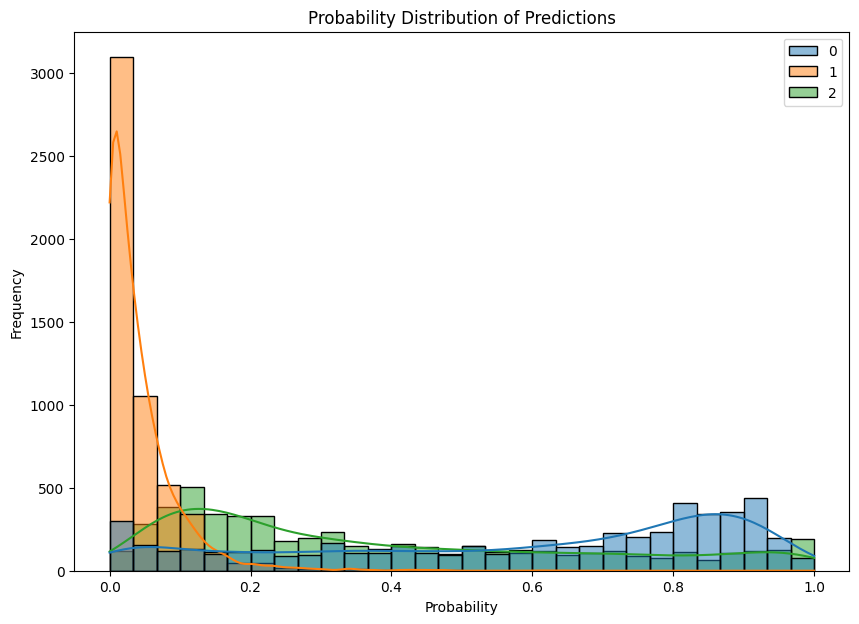

In [126]:
plt.figure(figsize=(10, 7))
sns.histplot(prob_test, kde=True, bins=30)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [124]:
submission=pd.DataFrame(prob_test,columns=['Status_C','Status_D','Status_CL'])
submission['id']=df_test['id']
submission=submission[['id','Status_C','Status_D','Status_CL']]

In [125]:
submission

,id,Status_C,Status_D,Status_CL
0,7905,0.46,0.14,0.40
1,7906,0.53,0.09,0.38
2,7907,0.12,0.11,0.77
3,7908,0.90,0.00,0.10
4,7909,0.61,0.07,0.32
...,...,...,...,...
5266,13171,0.72,0.04,0.24
5267,13172,0.85,0.00,0.15
5268,13173,0.89,0.01,0.10
5269,13174,0.82,0.09,0.09


In [127]:
submission.to_csv('submission.csv',index=False)

In [ ]:
#Submitted to kaggle a